     modality direction  day  interval        variable  pc method sampling  \
1274     text       All   14         4  average_length  15    RFC       up   
1541     text       All   14         6  average_length  13    RFC       up   
1074     text       All   14        12  average_length  12    RFC       up   
1435     text       All   14        24  average_length   2    RFC       up   
1376     text        In   14         4  average_length  15    RFC       up   
2225     text        In   14         6  average_length   5    RFC       up   
1860     text        In   14        12  average_length  15    RFC       up   
1771     text        In   14        24  average_length   2    RFC       up   
1        text       Out   14         4  average_length   1     LR     down   
36       text       Out   14         6  average_length   1     LR     down   
9        text       Out   14        12  average_length  14    SVC     down   
0        text       Out   14        24  average_length   1     L

ValueError: x and y must be the same size

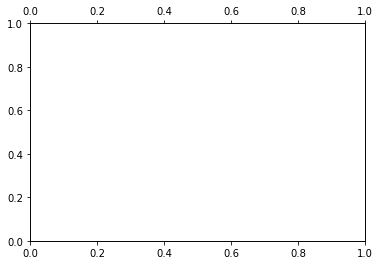

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 18 14:20:15 2021

@author: Veronica
"""

import numpy as np
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

def main():
    FILENAME = 'TSFELSummary.csv' #name of results summary file to use
    VARIABLE = 'average-length' #name of variable to use
    VARIABLE_TITLE = "Average Length" #title 

    df = pd.read_csv(FILENAME)
    df.drop('Unnamed: 0',axis=1,inplace=True)

    #for each combination of modality, direction, day, interval, and variable, take the highest mean f1 score
    df = df.loc[df.groupby(['modality','direction','day','interval','variable'])['f1_mean'].idxmax()]
    
    sub = df[df['modality'] == 'text']
    sub = sub[sub['variable'] == 'average_length']
    
    print(sub)

    #get subset of results for desired variable
    df = df[df['variable'] == VARIABLE]

    #get subset of results for text and call
    text = df[df['modality'] == 'text']
    call = df[df['modality'] == 'call']
    
    #order by direction
    textAll = text[text['direction'] == 'All']
    textIn = text[text['direction'] == 'In']
    textOut = text[text['direction'] == 'Out']
    text = pd.concat([textIn, textAll, textOut])
    
    callAll = call[call['direction'] == 'All']
    callIn = call[call['direction'] == 'In']
    callOut = call[call['direction'] == 'Out']
    call = pd.concat([callIn, callAll, callOut])
    
    #order by interval
    text4 = text[text['interval'] == 4]
    text6 = text[text['interval'] == 6]
    text12 = text[text['interval'] == 12]
    text24 = text[text['interval'] == 24]
    text = pd.concat([text4, text6, text12, text24])
    
    call4 = call[call['interval'] == 4]
    call6 = call[call['interval'] == 6]
    call12 = call[call['interval'] == 12]
    call24 = call[call['interval'] == 24]
    call = pd.concat([call4, call6, call12, call24])
    
    #combine
    results = pd.concat([text, call])
    results['color'] = results['direction'].apply(lambda x: 'black' if x=='All' else 'blue' if x=='In' else 'darkorange')
    
    fig = plt.figure()
    ax1 = fig.add_subplot()
    ax2 = ax1.twiny()
    
    x = [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 29, 30, 31]
    y = results['f1_mean']
    
    ax1.scatter(x, y, color=results['color'])
    ax1.errorbar(x, y, yerr=np.array(results['f1_stdev']), linestyle="None", color=results['color'])  
    ax1.set_xticks([2, 6, 10, 14, 18, 22, 26, 30])
    ax1.set_xticklabels([4, 6, 12, 24, 4, 6, 12, 24])
    ax1.set_xlabel('Aggregation Interval (hours)')
    
    ax1.set_yticks(np.arange(.5, .875, step=0.05))
    ax1.set_ylabel('F1 Mean')
    ax1.set_ylim(bottom=0.5)
    
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks([8, 24])
    ax2.set_xticklabels(['Text Logs','Call Logs'])
    
    All = mlines.Line2D([], [], color = 'black', marker='', label='All')
    In = mlines.Line2D([], [], color='blue', marker='', label='Incoming')
    Out = mlines.Line2D([], [], color='darkorange', marker='', label='Outgoing')
    ax1.legend(handles=[In, All, Out], loc="upper right", framealpha=1)

    ax1.axvline(x = 16, color='black')
    #ax1.axvline(x = 4, color='black', linestyle="dashed")
    #ax1.axvline(x = 8, color='black', linestyle="dashed")
    #ax1.axvline(x = 12, color='black', linestyle="dashed")
    #ax1.axvline(x = 20, color='black', linestyle="dashed")
    #ax1.axvline(x = 24, color='black', linestyle="dashed")
    #ax1.axvline(x = 28, color='black', linestyle="dashed")
                     
    ax1.set_title("TSFEL Features, " + VARIABLE_TITLE)   
        
    plt.show()

main()

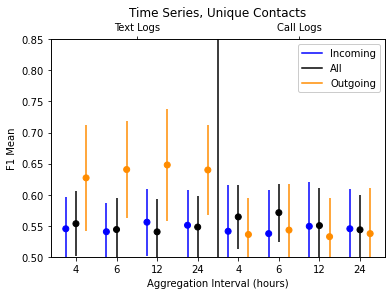

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 18 14:20:15 2021

@author: Veronica
"""

import numpy as np
import pandas as pd
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

def main():
    FILENAME = 'DTWSummary.csv' #name of results summary file to use
    VARIABLE = 'unique_contacts' #name of variable to use
    VARIABLE_TITLE = "Unique Contacts" #title 

    df = pd.read_csv(FILENAME)
    df.drop('Unnamed: 0',axis=1,inplace=True)
    
    #for each combination of modality, direction, day, interval, and variable, take the highest mean f1 score
    df = df.loc[df.groupby(['modality','direction','day','interval','variable'])['f1_mean'].idxmax()]

    #get subset of results for desired variable
    df = df[df['variable'] == VARIABLE]

    #get subset of results for text and call
    text = df[df['modality'] == 'text']
    call = df[df['modality'] == 'call']
    
    #order by direction
    textAll = text[text['direction'] == 'All']
    textIn = text[text['direction'] == 'In']
    textOut = text[text['direction'] == 'Out']
    text = pd.concat([textIn, textAll, textOut])
    
    callAll = call[call['direction'] == 'All']
    callIn = call[call['direction'] == 'In']
    callOut = call[call['direction'] == 'Out']
    call = pd.concat([callIn, callAll, callOut])
    
    #order by interval
    text4 = text[text['interval'] == 4]
    text6 = text[text['interval'] == 6]
    text12 = text[text['interval'] == 12]
    text24 = text[text['interval'] == 24]
    text = pd.concat([text4, text6, text12, text24])
    
    call4 = call[call['interval'] == 4]
    call6 = call[call['interval'] == 6]
    call12 = call[call['interval'] == 12]
    call24 = call[call['interval'] == 24]
    call = pd.concat([call4, call6, call12, call24])
    
    #combine
    results = pd.concat([text, call])
    results['color'] = results['direction'].apply(lambda x: 'black' if x=='All' else 'blue' if x=='In' else 'darkorange')
    
    fig = plt.figure()
    ax1 = fig.add_subplot()
    ax2 = ax1.twiny()
    
    x = [1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 17, 18, 19, 21, 22, 23, 25, 26, 27, 29, 30, 31]
    y = results['f1_mean']

    ax1.scatter(x, y, color=results['color'])
    ax1.errorbar(x, y, yerr=np.array(results['f1_stdev']), linestyle="None", color=results['color'])  
    ax1.set_xticks([2, 6, 10, 14, 18, 22, 26, 30])
    ax1.set_xticklabels([4, 6, 12, 24, 4, 6, 12, 24])
    ax1.set_xlabel('Aggregation Interval (hours)')
    
    ax1.set_yticks(np.arange(.5, .875, step=0.05))
    ax1.set_ylabel('F1 Mean')
    ax1.set_ylim(bottom=0.5)
    
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks([8, 24])
    ax2.set_xticklabels(['Text Logs','Call Logs'])
    
    All = mlines.Line2D([], [], color = 'black', marker='', label='All')
    In = mlines.Line2D([], [], color='blue', marker='', label='Incoming')
    Out = mlines.Line2D([], [], color='darkorange', marker='', label='Outgoing')
    ax1.legend(handles=[In, All, Out], loc="upper right", framealpha=1)

    ax1.axvline(x = 16, color='black')
    #ax1.axvline(x = 4, color='black', linestyle="dashed")
    #ax1.axvline(x = 8, color='black', linestyle="dashed")
    #ax1.axvline(x = 12, color='black', linestyle="dashed")
    #ax1.axvline(x = 20, color='black', linestyle="dashed")
    #ax1.axvline(x = 24, color='black', linestyle="dashed")
    #ax1.axvline(x = 28, color='black', linestyle="dashed")
                    
    ax1.set_title("Time Series, " + VARIABLE_TITLE)   
        
    plt.show()

main()